
# <span style="color:rgb(213,80,0)">Setup</span>

\- Create repository folders, explain what these folders are for. DAC, RDC, DSC. \- Store data in DAC \- Create matlab folder \- create a tmp.m file (temporary, at the end of the session this should be renamed

## Initialization

when running the script, choose change folder


In [1]:
close all;
clear;

% running the script will prompt the message: tmp.m cannot be found on
% path. It will ask to do something. Choose: change folder.

## Load Data

We will use data in tidy data format.


Changing folders automatically does not work in Live scripts


In [2]:
fname = fullfile('..','datasets','tactileperception','DAC','tidy_data_haptic_final.csv'); % file name, relative path
T = readtable(fname);



The data consist of a table, with columns response, stimulus, participant.


In [3]:
T(1,:)



## Graphics

We need to process as in week 1.


In [4]:
participant = T.participant;
response = T.response;
stimulus = T.orientation;
s        = deg2rad(clockmin2deg(stimulus));
r        = deg2rad(clockmin2deg(response));
sel        = abs(r-s)>0.5*pi;
r(sel)    = -r(sel);
stimulus        = rad2deg(s);
response        = rad2deg(r);

function y = clockmin2deg(x)
y = x/60*360;
end



We have multiple participants, and loop through it


In [5]:

up = unique(participant)

up = 15x1    
     1
     2
     3
     4
     5
     6
     7
     8
     9
    10

In [6]:
np = numel(up)

np = 15

In [7]:

figure(1)
clf
hold on
for ii = 1:np
    sel = participant == up(ii);
    x = stimulus(sel);
    y = response(sel);
    plot(x,y,'.');
end



Plot it nicer


In [8]:
xlabel(['stimulus orientation (' char(176) ')']);
ylabel(['response orientation (' char(176) ')']);
xlim([-95 95]);
ylim([-95 95]);
nicegraph; % does some nice graphing stuff, like axis square, box off, etc



And now also plot the average



In [9]:
[mu,ux] = assemble(response,stimulus);
plot(ux,mu,'k-','LineWidth',2);


## Doing Frequentist linear regression

Data seem to follow a straight line (perhaps a little curve). Let's try to fit a straight line.



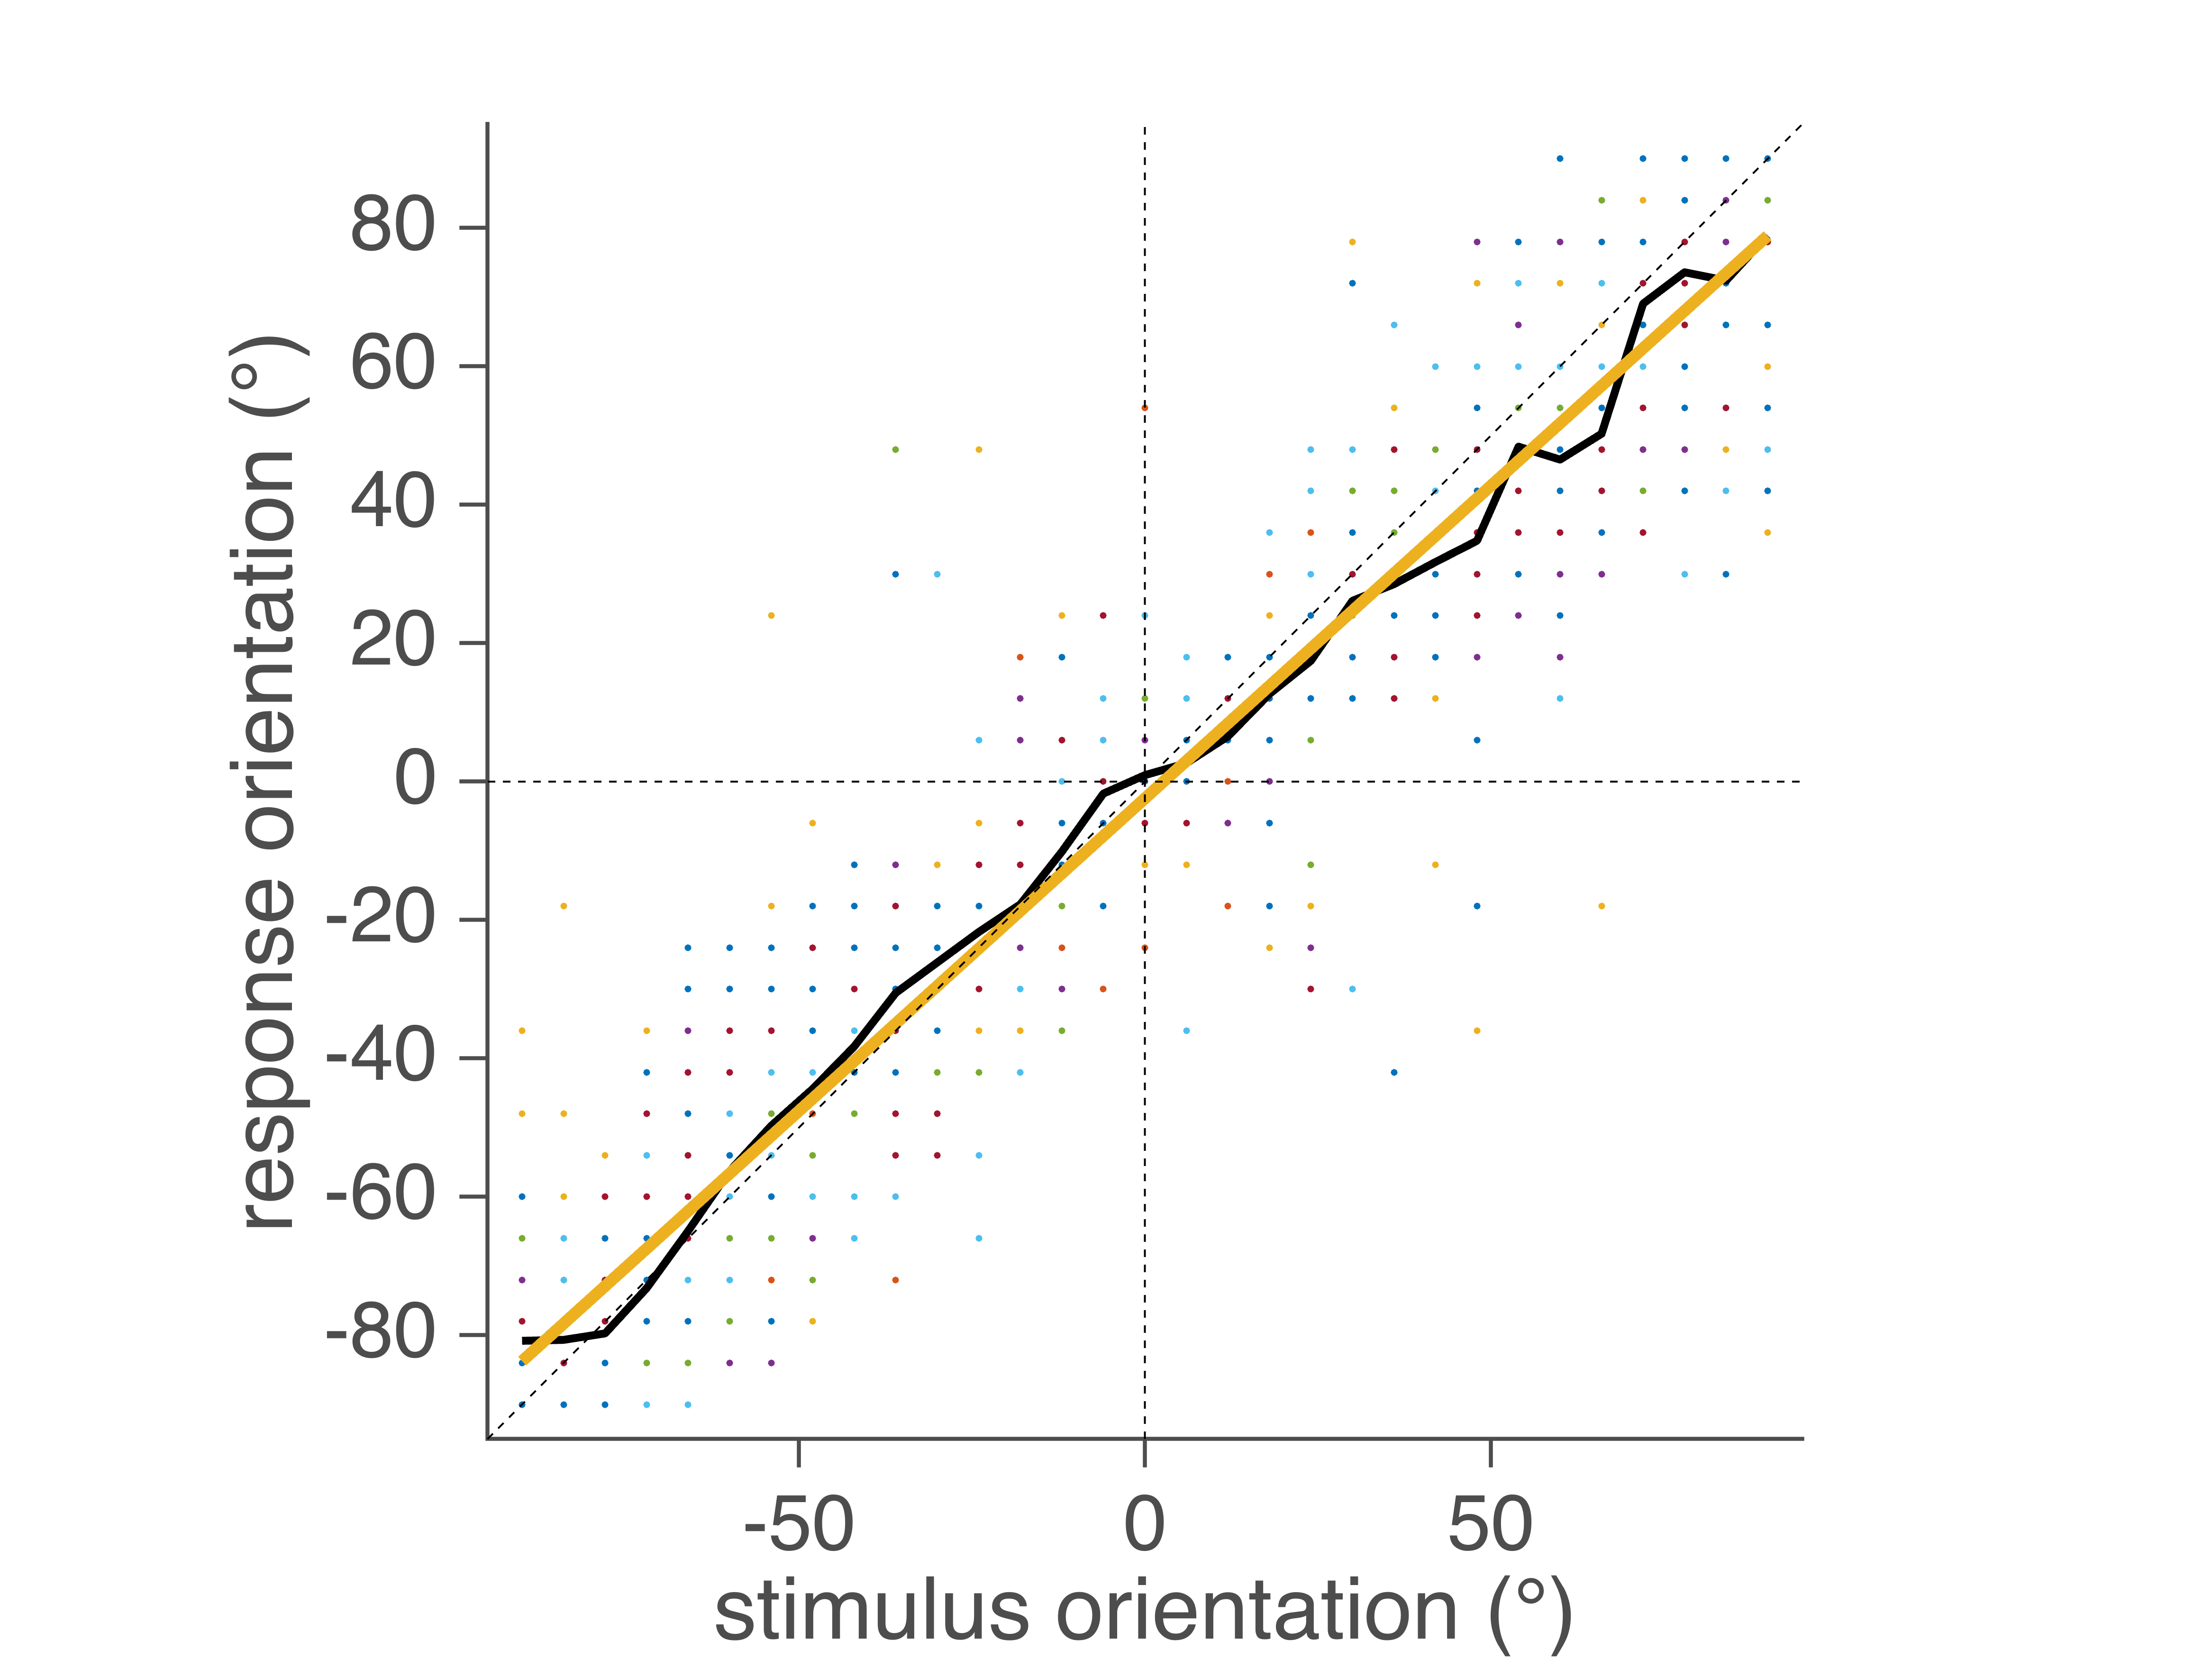

In [10]:
stats    = regstats(response,stimulus,'linear',{'beta'}); % linear regression, obtain only regression coefficients
beta    = stats.beta; % beta(1) = offset, beta(2) = slope
% what do these parameters mean? Are they meaningful?
% And continue with 'prediction'
xi        = -90:90;
ypred    = beta(2)*xi+beta(1);

figure(1)
hold on;
plot(xi,ypred,'-','LineWidth',3);
unityline;
horline;
verline;



We have multiple participants, and loop through it


In [11]:

up = unique(participant)

up = 15x1    
     1
     2
     3
     4
     5
     6
     7
     8
     9
    10

In [12]:
np = numel(up)

np = 15


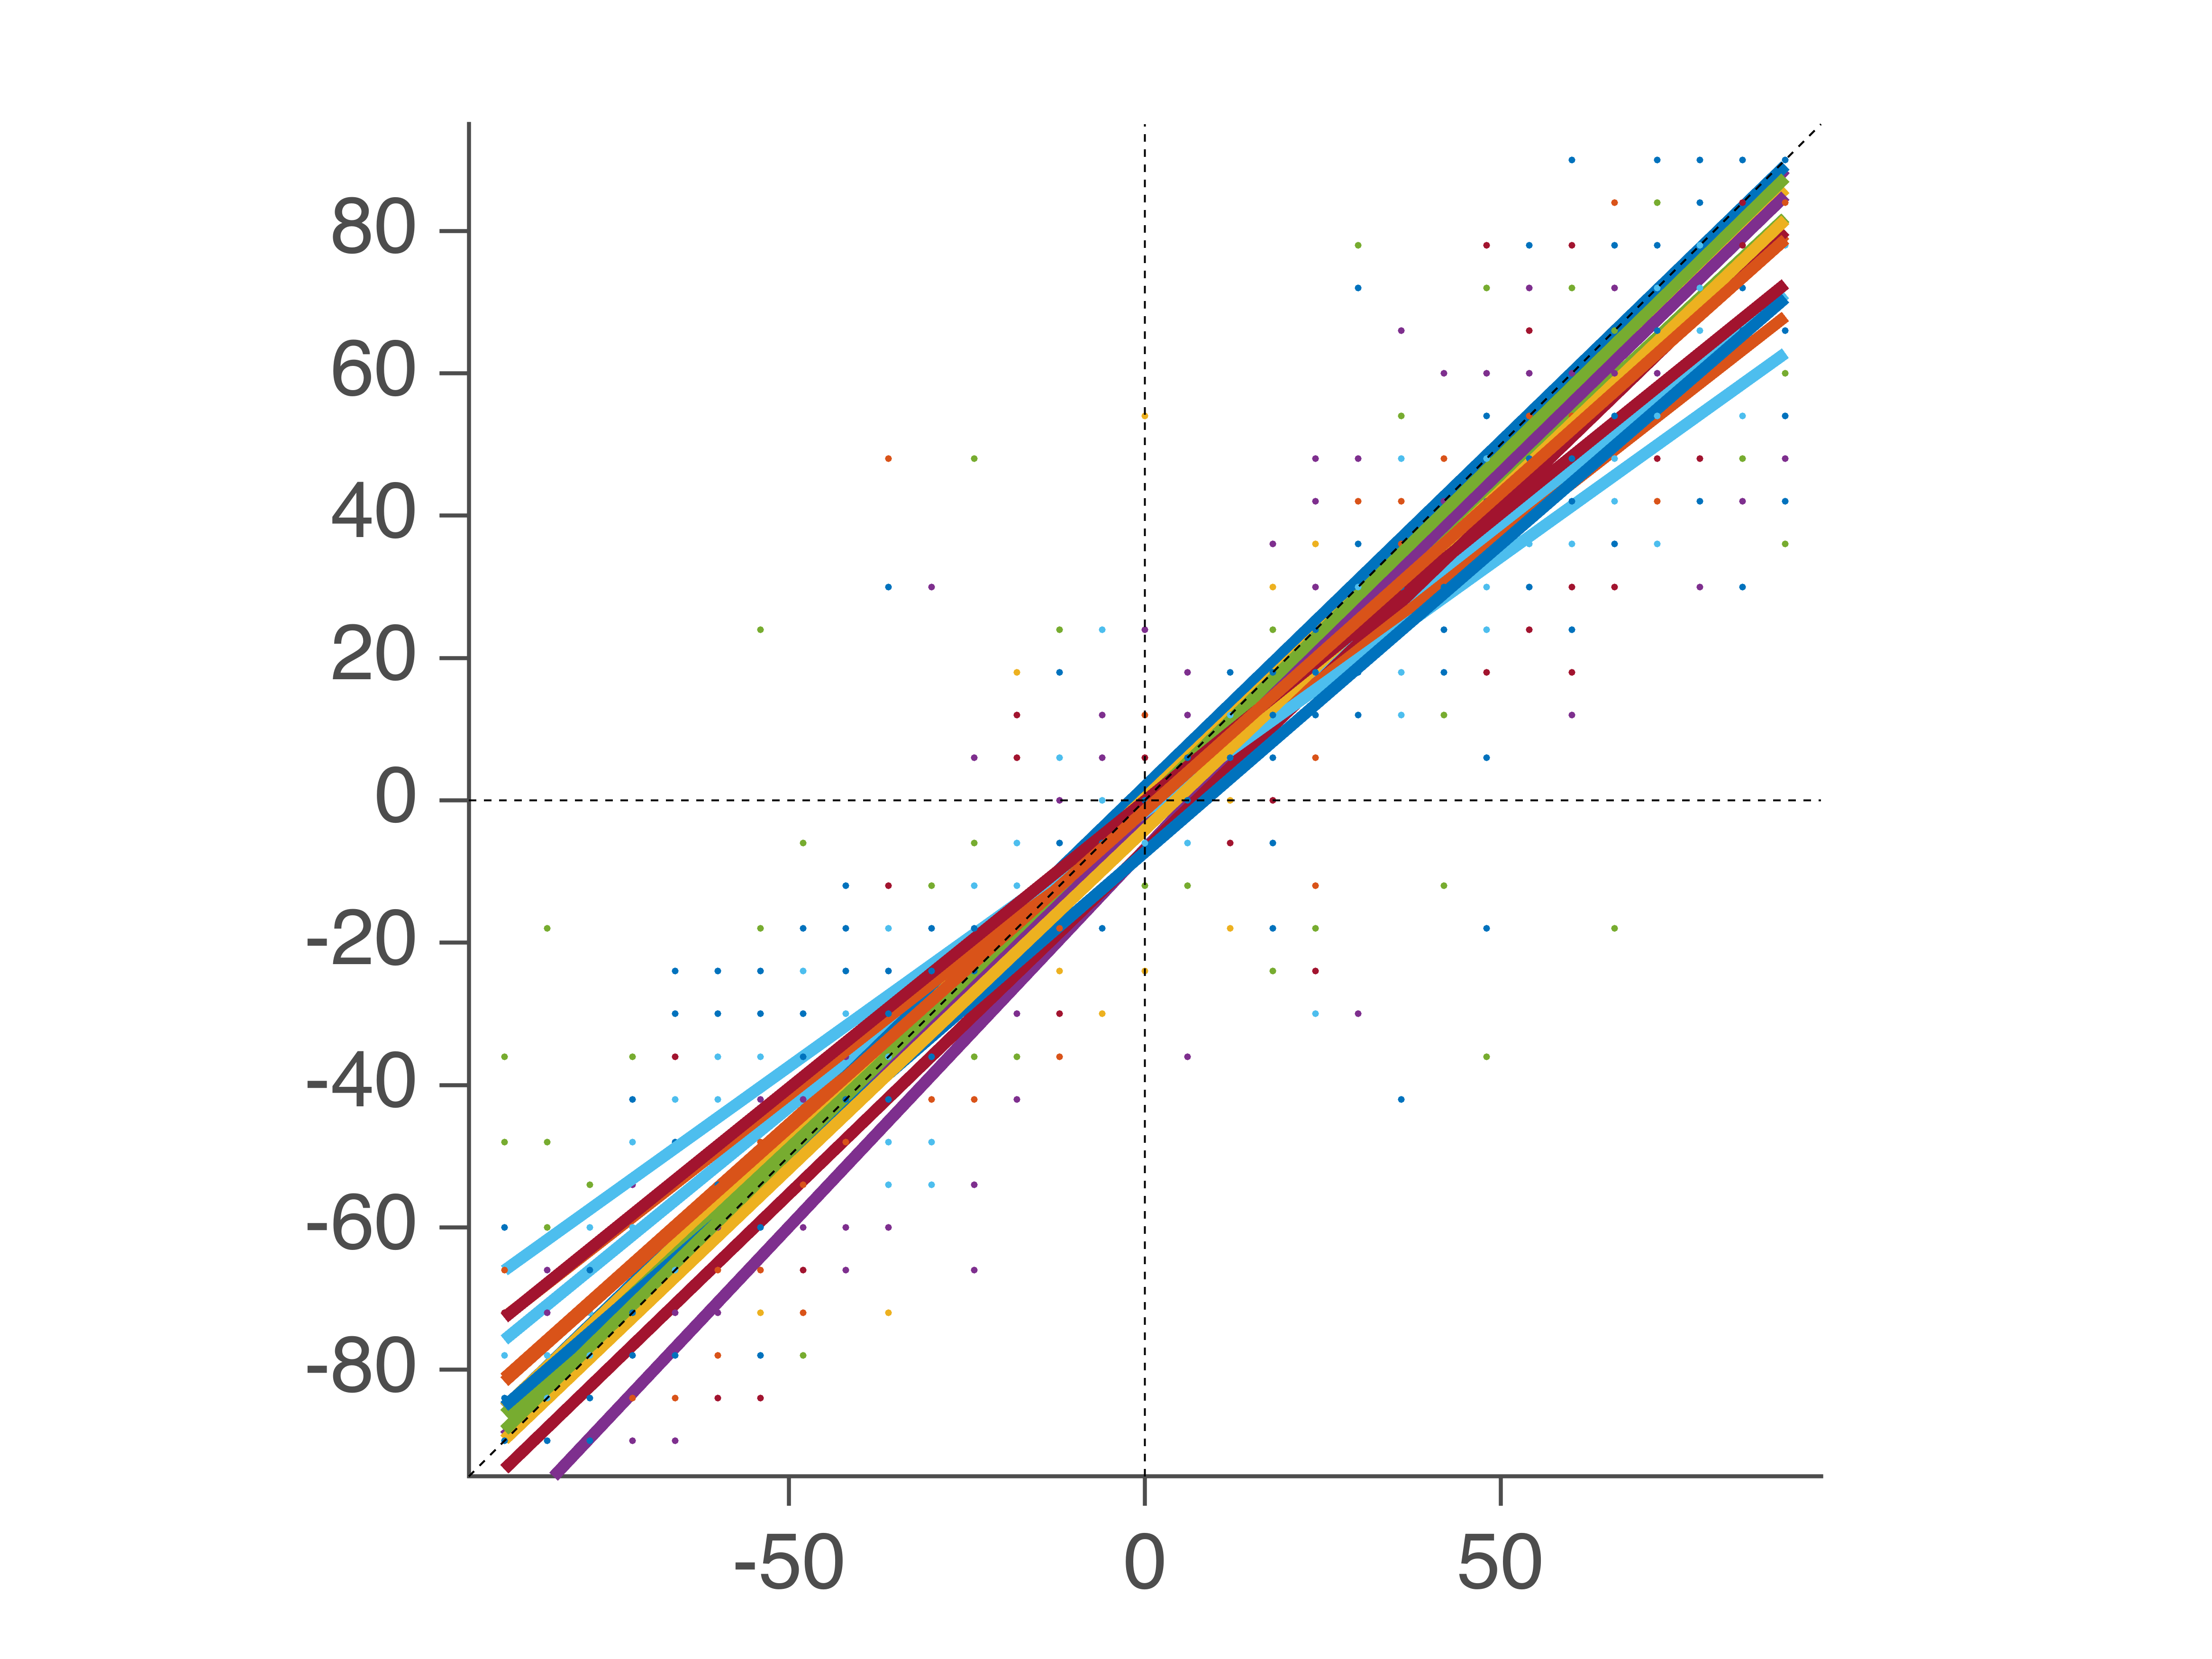

In [13]:

figure(2)
clf
hold on
for ii = 1:np
    sel = participant == up(ii);
    x = stimulus(sel);
    y = response(sel);
    stats    = regstats(y,x,'linear',{'beta'}); % linear regression, obtain only regression coefficients
beta    = stats.beta; % beta(1) = offset, beta(2) = slope
% what do these parameters mean? Are they meaningful?
% And continue with 'prediction'
xi        = -90:90;
ypred    = beta(2)*xi+beta(1);

    plot(x,y,'.');
    plot(xi,ypred,'-','LineWidth',3);

end
nicegraph;
xlim([-95 95]);
ylim([-95 95]);
unityline;
horline;
verline;


## Doing Bayesian analysis

Show that Bayesian analysis produces the same point estmate but does not produce a single number, it produces a distribution


In [14]:
%     % response azimuth vs stimulus azimuth
%     y = Data(:,6); % response azimuth
%     % y = y+50*randn(size(y));
%     x = Data(:,2); % stimulus  azimuth
%     s = Data(:,3); % stimulus frequency

x = stimulus;
y = response;
s = participant;
samples = hregjags(x,y,s);

Running JAGS...




Bayes does exactly the same as Frequentist...


but it takes longer...


Next chapter we will see why it is still better.


Quick preview:



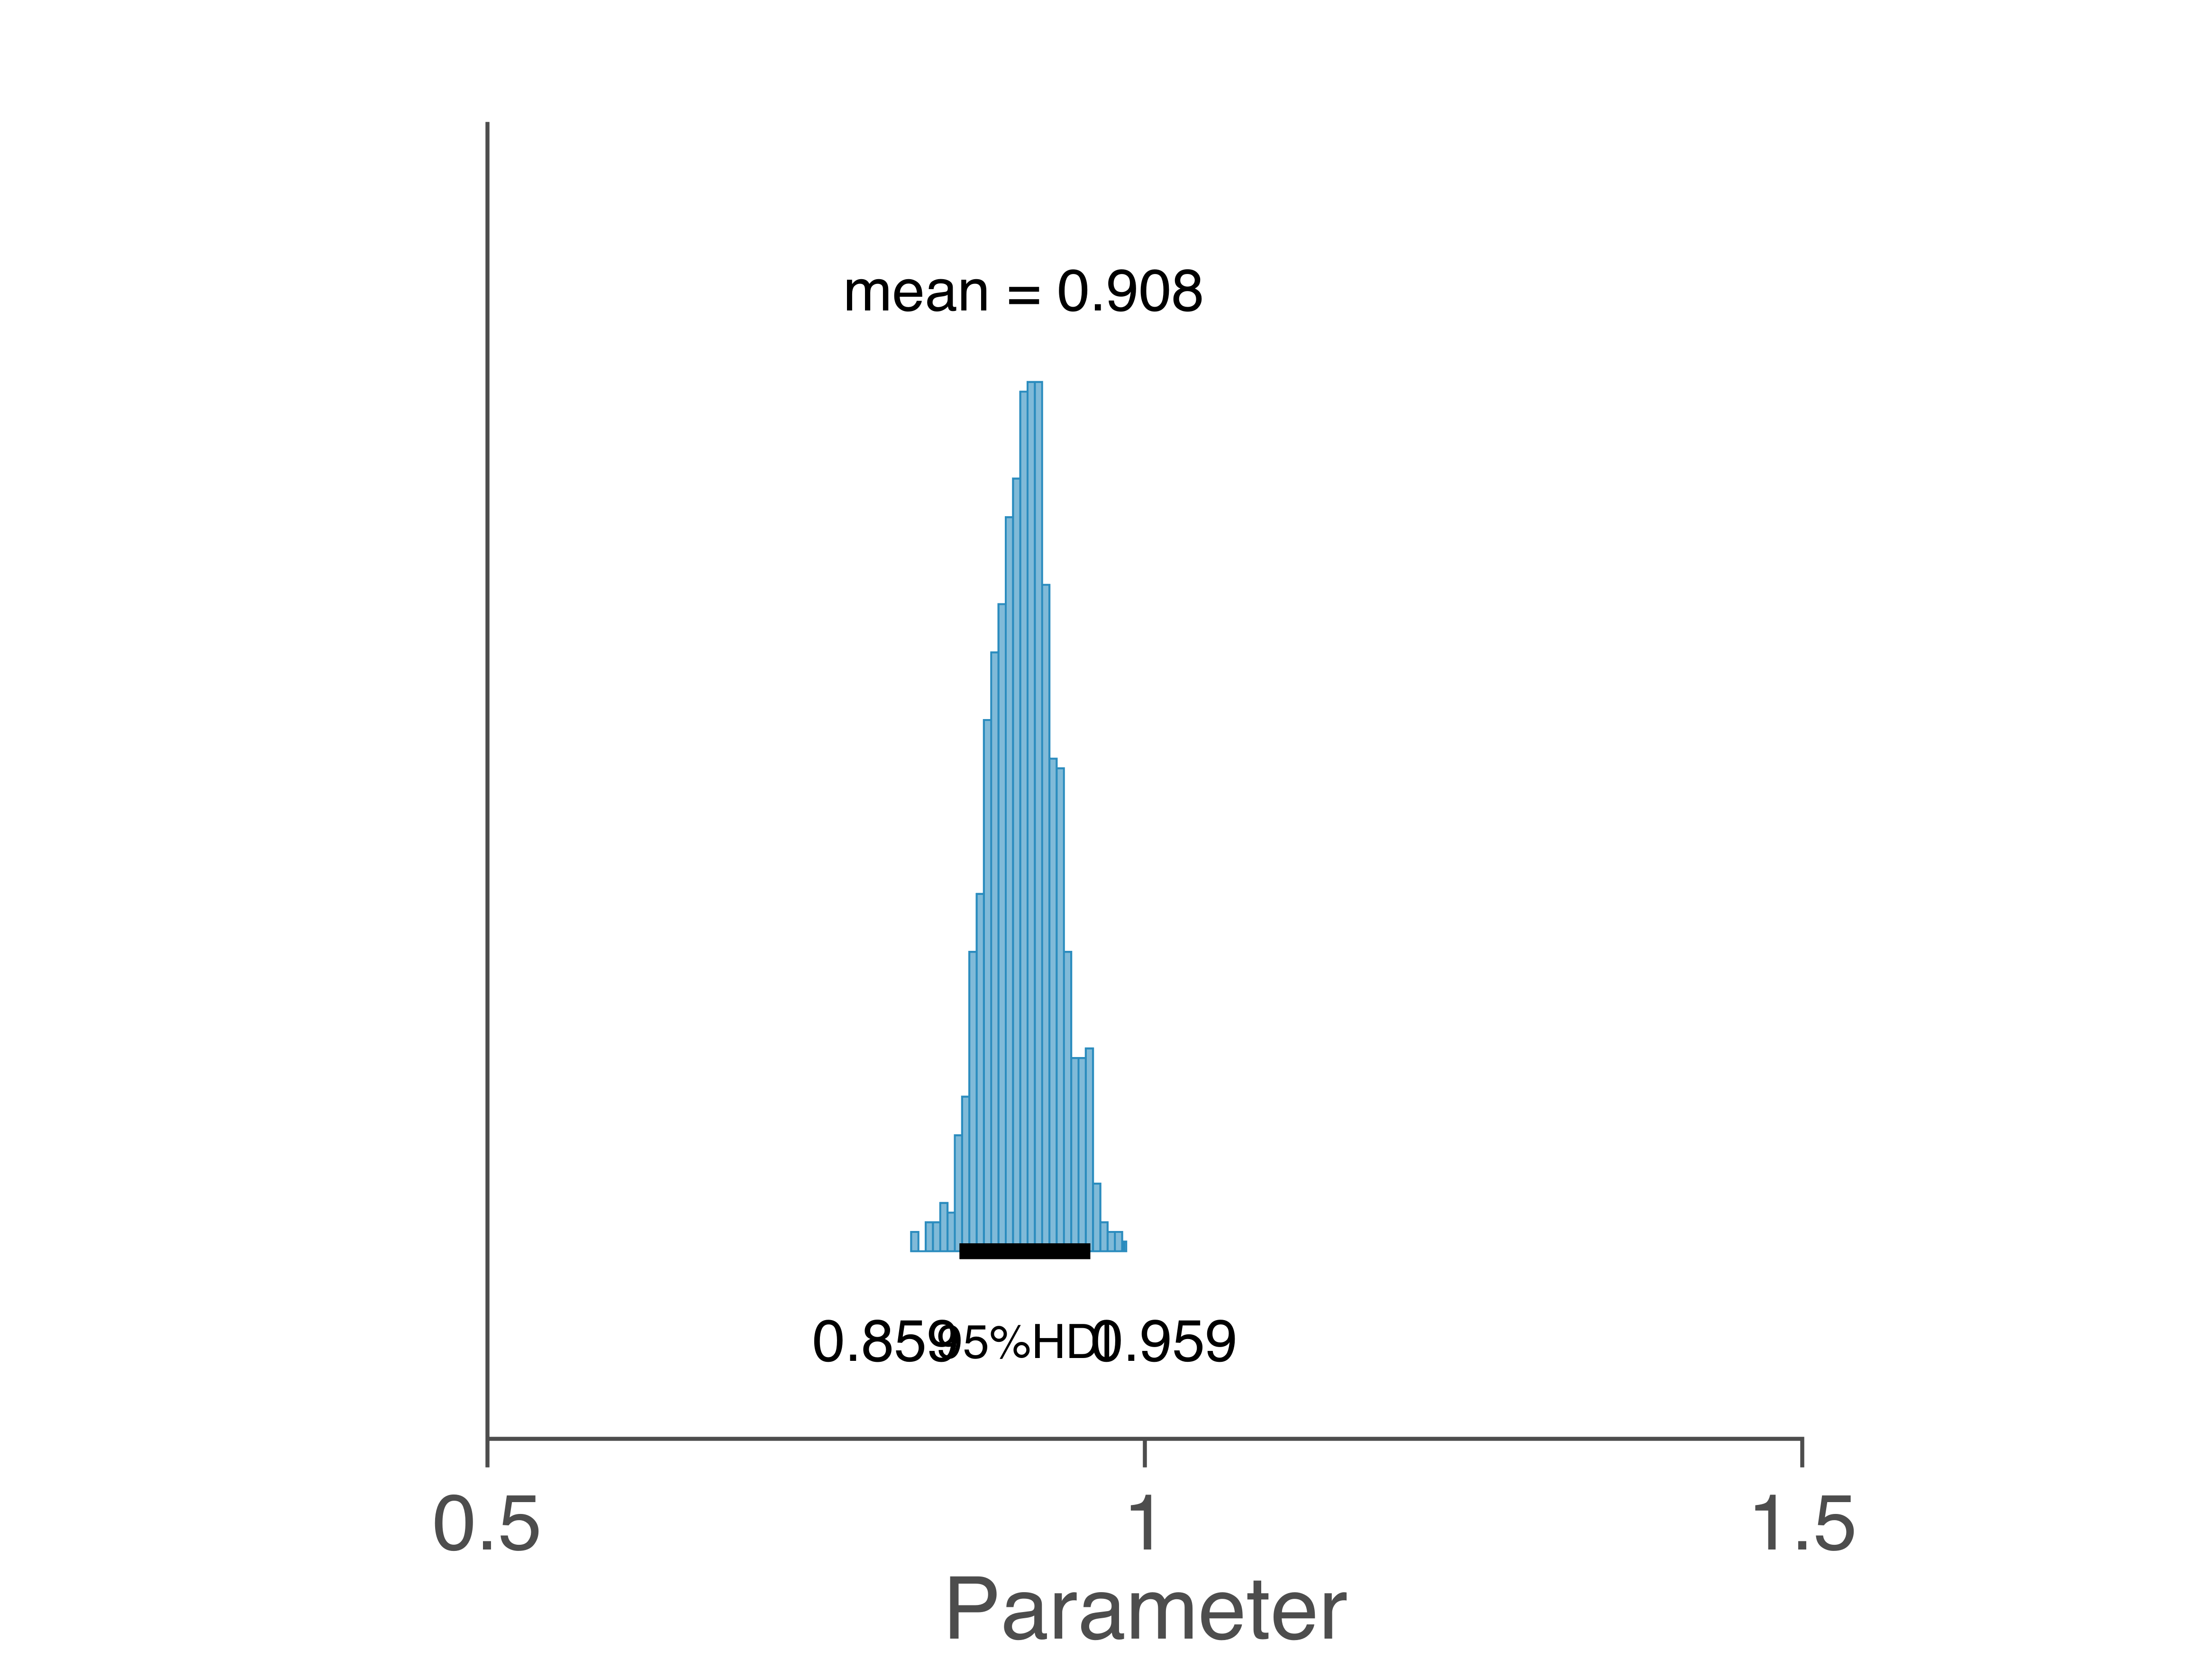

In [15]:

figure(42)
clf
plotpost(samples.beta1mu,'xlim',[0.5 1.5]);
nicegraph;



Show how this mean deviates from classical statistics and explain shrinkage.


Fake data, with outlier and few data points.


In [16]:
return
% beta

In [17]:
figure(42)
clf
plotpost(mcmc.beta1,'xlim',[0 1.2]);
nicegraph;


function plotstimres(x,y,sb)

In [18]:
% Build this up: first just plot, and discuss what would make this figure
% better
subplot(1,3,sb)
plot(x,y,'ko','MarkerFaceColor','k','MarkerEdgeColor','w','Markersize',13,'LineWidth',2);
hold on
xlabel('stimulus elevation (deg)');
ylabel('response elevation (deg)');
% set(gca,'FontSize',20);
set(gca,'Xtick',-90:30:90,'Ytick',-90:30:90);
xlim([-100 100]);
ylim([-100 100]);
% axis square;
% box off;
nicegraph;
end